# Aircraft Purchase Analysis Project

## Business Problem

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase


## Objective.

In order to anaylize the difference in aircraft safety. We first must determine which aircrafts cause the most accidents, we will do by determining the following:

* Analyzing the amount of different accidents fatal, serious, Non-Fatal
* Aircraft damage
* Injury Severity

I'll first proceed by installing the neccessary libraries needed to complete these objectives

Import neccessary libraries from python


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Extract the data required, found in the NTSB database.

In [2]:
data = pd.read_csv('./data/AviationData.csv', encoding='latin-1')

C:\Users\omend\AppData\Local\Temp\ipykernel_15212\2146229675.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./data/AviationData.csv', encoding='latin-1')


In [3]:
data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
data['Injury.Severity'].values

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', ..., 'Non-Fatal', nan, 'Minor'],
      dtype=object)

In [6]:
data['Injury.Severity'].isna().sum()

1000

Based off the information we see that there are missing items within the injury severity, and aircraft damage

In [7]:
data.dropna(subset=['Injury.Severity', 'Make', 'Aircraft.damage'], inplace=True)

In [8]:
data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     45
Country                     210
Latitude                  51886
Longitude                 51896
Airport.Code              36254
Airport.Name              33723
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         54803
Registration.Number        1172
Make                          0
Model                        43
Amateur.Built                82
Number.of.Engines          4528
Engine.Type                5439
FAR.Description           55031
Schedule                  74608
Purpose.of.flight          4090
Air.carrier               70308
Total.Fatal.Injuries      10905
Total.Serious.Injuries    12177
Total.Minor.Injuries      11466
Total.Uninjured            5804
Weather.Condition          2876
Broad.phase.of.flight     24909
Report.Status              4873
Publication.Date          13086
dtype: i

In [9]:
data[data['Make'] == 'BOEING']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64134,20080307X00283,Incident,DFW08IA074,2008-03-01,"Dallas, TX",United States,325043N,0096519W,DAL,DALLAS LOVE FIELD,...,NaN,SOUTHWEST AIRLINES CO,0.0,0.0,0.0,244.0,IMC,NaN,The failure of the taxiing flight crew to main...,25-09-2020
64247,20080404X00426,Incident,DFW08IA087,2008-03-27,"Houston, TX",United States,030026N,0951849W,KIAH,George Bush Intercontinental,...,NaN,Continental Airlines Inc,0.0,0.0,0.0,118.0,VMC,NaN,The flight crew's improper landing technique f...,25-09-2020
64341,20080417X00501,Accident,CHI08LA102,2008-04-14,"Youngstown, OH",United States,405742N,0804038W,4G4,Youngstown Elser Airport,...,Flight Test,M&S Aviation LLC,0.0,1.0,1.0,0.0,VMC,NaN,The pilot's failure to maintain adequate airsp...,25-09-2020
64387,20081003X63355,Incident,ENG08IA022,2008-04-20,"Newark, NJ",United States,404427N,0741014W,EWR,Newark Liberty International,...,NaN,KALITTA AIR LLC,0.0,0.0,0.0,5.0,NaN,NaN,An engine fire in the No. 3 engine due to the ...,25-09-2020
64423,20081219X16532,Incident,ENG08IA025,2008-04-27,"Singapore, Senegal",Senegal,NaN,NaN,SIN,Singapore Changi Airport,...,NaN,FedEx Ecpress,0.0,0.0,0.0,0.0,NaN,NaN,The Center Landing gear (CLG) strut failed due...,03-11-2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88592,20220929106019,Accident,DCA22WA214,2022-09-28,"London,",Great Britain,512820N,0002717E,EGLL,London Heathrow Airport,...,NaN,NaN,0.0,0.0,0.0,2.0,NaN,NaN,NaN,12-10-2022
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,NaN,Saudi Airlines,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022
88673,20221017106138,Accident,WPR23LA014,2022-10-15,"Petaluma, CA",United States,381528N,1223619W,O69,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,21-10-2022
88723,20221201106394,Accident,WPR23LA050,2022-10-26,"Long Beach, CA",United States,033495N,0011897W,KLGB,Long Beach Airport,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,NaN,01-12-2022


In [10]:
data['Make'] = data['Make'].str.title()
data['Make']

0                           Stinson
1                             Piper
2                            Cessna
3                          Rockwell
4                            Cessna
                    ...            
88869                         Piper
88873            Cirrus Design Corp
88876                    Swearingen
88877                        Cessna
88886    American Champion Aircraft
Name: Make, Length: 85164, dtype: object

In [11]:
data[data['Make'] == 'Boeing']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
50,20020917X02242,Accident,LAX82DVA10,1982-01-06,"NEAR BAKERSFIEL, CA",United States,NaN,NaN,NaN,NaN,...,Unknown,NaN,0.0,1.0,0.0,1.0,IMC,Cruise,Probable Cause,06-01-1983
84,20020917X01907,Accident,DCA82AA011,1982-01-13,"WASHINGTON, DC",United States,NaN,NaN,NaN,WASHINGTON NATIONAL,...,Unknown,"Air Florida, Inc",78.0,6.0,3.0,0.0,IMC,Takeoff,Probable Cause,13-01-1983
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,Aerial Application,NaN,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983
320,20020917X02336,Incident,LAX82IA075,1982-02-15,"ONTARIO, CA",United States,NaN,NaN,ONT,ONTARIO INTERNATIONAL,...,Unknown,Aircal,0.0,0.0,0.0,119.0,IMC,Approach,Probable Cause,15-02-1983
344,20020917X02404,Accident,MIA82FA051,1982-02-17,"MIAMI, FL",United States,NaN,NaN,MIA,MIAMI INTERNATIONAL,...,Unknown,"Pan American World Airways, In",0.0,1.0,1.0,51.0,VMC,Takeoff,Probable Cause,17-02-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88592,20220929106019,Accident,DCA22WA214,2022-09-28,"London,",Great Britain,512820N,0002717E,EGLL,London Heathrow Airport,...,NaN,NaN,0.0,0.0,0.0,2.0,NaN,NaN,NaN,12-10-2022
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,NaN,Saudi Airlines,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022
88673,20221017106138,Accident,WPR23LA014,2022-10-15,"Petaluma, CA",United States,381528N,1223619W,O69,NaN,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,21-10-2022
88723,20221201106394,Accident,WPR23LA050,2022-10-26,"Long Beach, CA",United States,033495N,0011897W,KLGB,Long Beach Airport,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,NaN,01-12-2022


In [12]:
data['Injury.Severity']

0         Fatal(2)
1         Fatal(4)
2         Fatal(3)
3         Fatal(2)
4         Fatal(1)
           ...    
88869    Non-Fatal
88873    Non-Fatal
88876    Non-Fatal
88877        Minor
88886    Non-Fatal
Name: Injury.Severity, Length: 85164, dtype: object

In [13]:
data['Aircraft.damage']

0          Destroyed
1          Destroyed
2          Destroyed
3          Destroyed
4          Destroyed
            ...     
88869    Substantial
88873    Substantial
88876    Substantial
88877    Substantial
88886    Substantial
Name: Aircraft.damage, Length: 85164, dtype: object

I noticed that within the 'Injury.Severity' column that Fatal has a number of repeated inputs that have parantheses following the entry. To eliminate any confusion, I will proceed to replace all rows that have 'Fatal' under one category

In [14]:
#replacing the () for items within the injury severity column, regex, removes the parantheses from fatal 
data['Injury.Severity'].replace(regex='\((\d+)\)', value= '', inplace=True)

Once we clean the column up. I want to group the injury type by make of the aircraft. Assessing which models have had fatal, serious, minor, Non-Fatal

In [15]:
total_fatal = sum(data['Injury.Severity'] == 'Fatal')
total_fatal

17584

In [16]:
fatal_percentage = round(total_fatal/len(data['Injury.Severity']) * 100, 2)
print(f"The total percentage of aircraft that have had a fatal outcome: {fatal_percentage}%")

The total percentage of aircraft that have had a fatal outcome: 20.65%


In [17]:
total_non_fatal = sum(data['Injury.Severity'] == 'Non-Fatal')
total_non_fatal

65746

In [18]:
non_fatal_percentage = round(total_non_fatal/len(data['Injury.Severity']) * 100, 2)
print(f"The total percentage of aircraft that have had a non-fatal outcome: {non_fatal_percentage}%")

The total percentage of aircraft that have had a non-fatal outcome: 77.2%


In [19]:
total_minor = sum(data['Injury.Severity'] == 'Minor')
total_minor

204

In [20]:
minor_percentage = round(total_minor/len(data['Injury.Severity']) * 100, 2)
print(f"The total percentage of aircraft that have had a non-fatal outcome: {minor_percentage}%")

The total percentage of aircraft that have had a non-fatal outcome: 0.24%


In [21]:
total_serious = sum(data['Injury.Severity'] == 'Serious')
total_serious

151

In [22]:
serious_percentage = round(total_serious/len(data['Injury.Severity']) * 100, 2)
print(f"The total percentage of aircraft that have had a non-fatal outcome: {serious_percentage}%")

The total percentage of aircraft that have had a non-fatal outcome: 0.18%


In [23]:
fatal = data[data['Injury.Severity'] == 'Fatal']
fatal['Injury.Severity']

0        Fatal
1        Fatal
2        Fatal
3        Fatal
4        Fatal
         ...  
88839    Fatal
88842    Fatal
88843    Fatal
88845    Fatal
88846    Fatal
Name: Injury.Severity, Length: 17584, dtype: object

In [24]:
#groups the DataFrame data by the columns 'Make' and 'Injury.Severity' and calculates
#the size (count) of each group, resetting the index of the resulting DataFrame
# grouped again by 'Injury.Severity', and for each group, the maximum size is calculated.

injury_type = data.groupby(['Injury.Severity']).size().reset_index().groupby('Injury.Severity').max()

In [25]:
injury_type

,0
Injury.Severity,
Fatal,17584
Incident,1390
Minor,204
Non-Fatal,65746
Serious,151
Unavailable,89


In [26]:
injury_type.index

Index(['Fatal', 'Incident', 'Minor', 'Non-Fatal', 'Serious', 'Unavailable'], dtype='object', name='Injury.Severity')

In [27]:
injury_type.columns

Index([0], dtype='object')

We would like check and see the number of Fatal accidents vs Minor, Serious, Non-Fatal.

* Fatal -> Any injury resulting in death within 30 days of accidents

* Incident -> An occurrence other than an accident, associated with the operation of an aircraft, which affects or could affect the safety of operations.

* Serious -> Serious injury means any injury which: (1) Requires hospitalization for more than 48 hours, commencing within 7 days from the date of the injury was received; (2) results in a fracture of any bone (except simple fractures of fingers, toes, or nose); (3) causes severe hemorrhages, nerve, muscle, or tendon damage; (4) involves any internal organ; or (5) involves second- or third-degree burns, or any burns affecting more than 5 percent of the body surface.

* Minor -> Not specified, although if an injury does not meet the criteria for another injury category

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

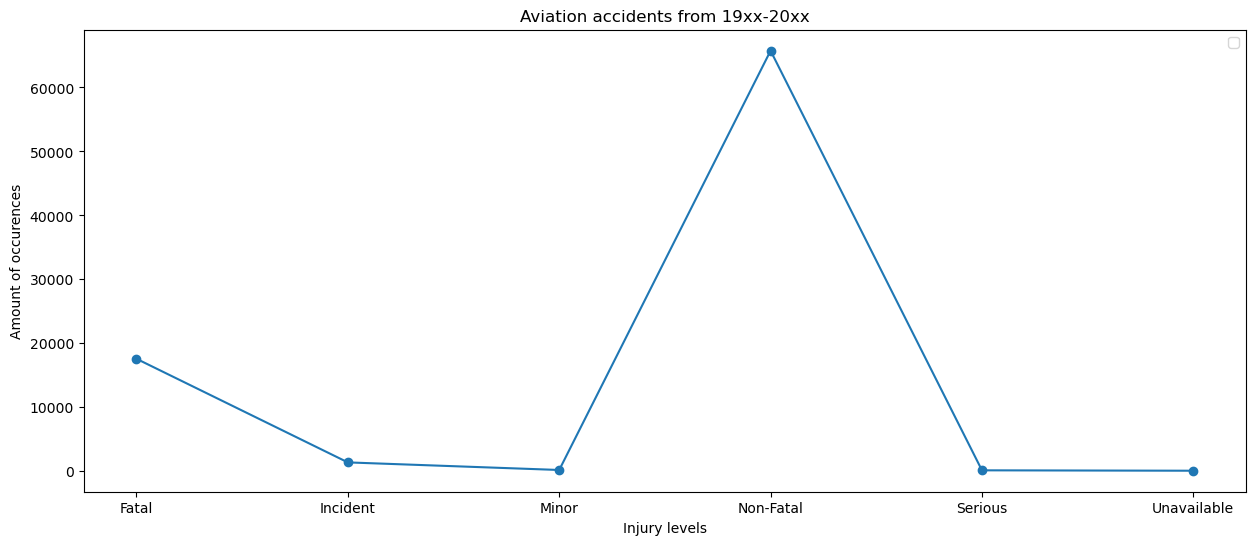

In [28]:
color = ['blue', 'green', 'yellow', 'purple', 'lightblue','coral']
fig, ax = plt.subplots(figsize=(15,6))

# ax.bar(injury_type.index, injury_type[0], color=color, label=injury_type.index)
ax.plot(injury_type.index, injury_type[0], marker='o')
ax.set_xlabel('Injury levels')
ax.set_ylabel('Amount of occurences')
ax.set_title('Aviation accidents from 19xx-20xx')
ax.legend()
plt.show

Checking the graph above. 

We can see that a large amount of accidents resulted in Non-Fatal injuries, and significant amount of aircrafts were considered to be 'Fatal'.

Let's examine which aircrafts had fatal accidents and which aircrafts had non-fatal accidents

We'll analyze the non-fatal first, and save it to a variable

In [29]:
non_fatal_injuries = data[data['Injury.Severity'] == 'Non-Fatal']
non_fatal_injuries['Injury.Severity'].values

array(['Non-Fatal', 'Non-Fatal', 'Non-Fatal', ..., 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal'], dtype=object)

Next, we will assess aircraft damages obtained by each aircraft. Gathering information from which aircrafts are still usable. We'll start by assessing the aircrafts damage reported on each aircraft within the copy of the non-fatal df

In [30]:
non_fatal_injuries['Aircraft.damage'].head(50).values

array(['Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Destroyed', 'Destroyed',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Destroyed',
       'Destroyed', 'Destroyed', 'Substantial', 'Substantial',
       'Substantial', 'Destroyed'], dtype=object)

There are a number of aircrafts that have damage ranging from Destroyed, Substantial, Minor, and Unknown. Lets focus on gathering information on the aircrafts that have minor damages.

### Based on the definitions provided by the NTSB and FAA:

* Destroyed - if all of its primary structure is damaged to the extent that it would be impracticable to return the aircraft to an airworthy condition by repair.
* Substantial - damage means damage or failure which adversely affects the structural strength, performance, or flight characteristics of the aircraft, and which would normally require major repair or replacement of the affected component.
* Minor - means the aircraft either is in an airworthy condition or is restorable to airworthy condition by minor repairs.



We will check to see if there are any missing values stil within the column. Even though the missing values were removed earlier. Then check to see the values within the column

In [31]:
data['Aircraft.damage']

0          Destroyed
1          Destroyed
2          Destroyed
3          Destroyed
4          Destroyed
            ...     
88869    Substantial
88873    Substantial
88876    Substantial
88877    Substantial
88886    Substantial
Name: Aircraft.damage, Length: 85164, dtype: object

In [32]:
data['Aircraft.damage'].isna().sum()

0

In [33]:
data['Aircraft.damage'].head(50).values

array(['Destroyed', 'Destroyed', 'Destroyed', 'Destroyed', 'Destroyed',
       'Substantial', 'Destroyed', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Destroyed',
       'Destroyed', 'Destroyed', 'Destroyed', 'Destroyed', 'Destroyed',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Minor', 'Destroyed', 'Destroyed', 'Destroyed',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Destroyed', 'Destroyed', 'Destroyed',
       'Substantial', 'Destroyed', 'Destroyed', 'Destroyed', 'Destroyed',
       'Minor', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial', 'Substantial', 'Substantial',
       'Substantial', 'Substantial'], dtype=object)

In [34]:
destroyed_aircrafts = data['Aircraft.damage'].str.count('Destroyed').sum()
destroyed_aircrafts

18550

In [35]:
destroyed_percentage = round(destroyed_aircrafts / len(data['Aircraft.damage']) * 100, 2)
print(f"Destroyed aircrafts: {destroyed_percentage}%")

Destroyed aircrafts: 21.78%


In [36]:
substantial_aircrafts = data['Aircraft.damage'].str.count('Substantial').sum()
substantial_aircrafts

63943

In [37]:
substantial_percentage = round(substantial_aircrafts / len(data['Aircraft.damage']) * 100, 2)
print(f"Substantiall damaged aircrafts: {substantial_percentage}%")

Substantiall damaged aircrafts: 75.08%


In [38]:
minor_aircraft = data['Aircraft.damage'].str.count('Minor').sum()
minor_aircraft

2579

In [39]:
minor_percentage = round(minor_aircraft / len(data['Aircraft.damage']) * 100, 2)
print(f"Minor damaged aircrafts: {minor_percentage}%")

Minor damaged aircrafts: 3.03%


In [40]:
damaged_aircrafts = data.groupby('Aircraft.damage').size().reset_index().groupby('Aircraft.damage').max()
type(damaged_aircrafts)
damaged_aircrafts

,0
Aircraft.damage,
Destroyed,18550
Minor,2579
Substantial,63943
Unknown,92


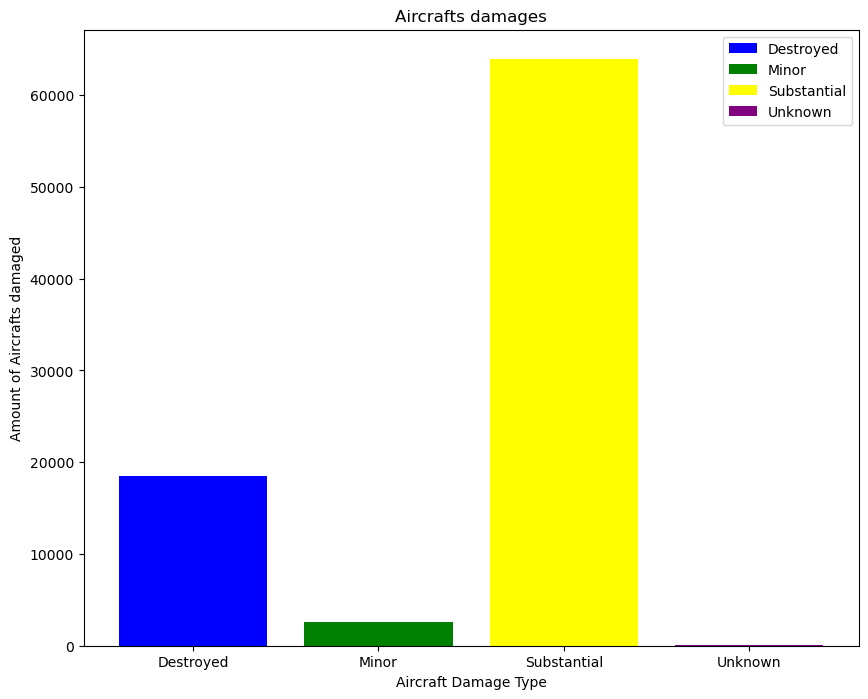

In [41]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(damaged_aircrafts.index,damaged_aircrafts[0], color=color, label=damaged_aircrafts.index)
ax.set_xlabel("Aircraft Damage Type")
ax.set_ylabel('Amount of Aircrafts damaged')
ax.set_title('Aircrafts damages')
ax.legend()
plt.show()

As you can see, the amount of aircrafts that have **substantial damage equate to 75.06%** of the amount of planes. While aircrafts considered **destroyed amount to 21.78%**. Aircrafts with **minor damage equate for 3.03%** of the total amount of planes damaged. Let's focus on the aircrafts that have been in non-fatal accidents and are reported with minor damages

Using the copy of the data in the non_fatal_injuries df. We'll discover which aircrafts have minor damage

In [42]:
minor_damaged_aircrafts = non_fatal_injuries[non_fatal_injuries['Aircraft.damage'] == 'Minor']
minor_damaged_aircrafts

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
230,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,NaN,NaN,PHL,PHILADELPHIA INTL,...,Unknown,United Airlines Inc.,0.0,1.0,0.0,154.0,IMC,Takeoff,Probable Cause,03-02-1983
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,Aerial Application,NaN,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983
244,20020917X02173,Accident,LAX82DA065B,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,Standing,Probable Cause,06-02-1983
535,20020917X01716,Accident,ATL82DKW06B,1982-03-11,"NASHVILLE, TN",United States,NaN,NaN,BNA,NASHVILLE METRO,...,Unknown,NaN,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,11-03-1983
746,20020917X02095,Accident,FTW82DQG17,1982-04-03,"MASTERSON, TX",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,03-04-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88260,20220805105670,Accident,ERA22LA358,2022-07-28,"Dillingham, AK",United States,059241N,1583020W,DLG,Dilingham,...,NaN,GRANT AVIATION INC,0.0,0.0,0.0,3.0,VMC,NaN,NaN,18-08-2022
88445,20220907105882,Accident,GAA22WA271,2022-08-31,"Trangie, OF",American Samoa,315829S,0148012E,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-10-2022
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,NaN,Saudi Airlines,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022
88725,20221027106213,Accident,ERA23LA043,2022-10-27,"Roberta, GA",United States,324249N,0084143W,0GA9,GENTLE LANDINGS AIR PARK,...,Personal,NaN,0.0,0.0,0.0,3.0,VMC,NaN,NaN,30-11-2022


In [43]:
minor_damaged_aircrafts.shape

(1094, 31)

In [44]:
type(minor_damaged_aircrafts)

pandas.core.frame.DataFrame

In [45]:
minor_damaged_aircrafts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1094 entries, 230 to 88795
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                1094 non-null   object 
 1   Investigation.Type      1094 non-null   object 
 2   Accident.Number         1094 non-null   object 
 3   Event.Date              1094 non-null   object 
 4   Location                1093 non-null   object 
 5   Country                 1092 non-null   object 
 6   Latitude                549 non-null    object 
 7   Longitude               549 non-null    object 
 8   Airport.Code            673 non-null    object 
 9   Airport.Name            690 non-null    object 
 10  Injury.Severity         1094 non-null   object 
 11  Aircraft.damage         1094 non-null   object 
 12  Aircraft.Category       691 non-null    object 
 13  Registration.Number     1073 non-null   object 
 14  Make                    1094 non-null   ob

In [46]:
minor_damaged_aircrafts['Injury.Severity'].head(50).values

array(['Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal'],
      dtype=object)

In [47]:
minor_damaged_aircrafts['Injury.Severity'].tail(50).values

array(['Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal',
       'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal', 'Non-Fatal'],
      dtype=object)

The total amount of aircrafts that have minor damage and have had non-fatal occurrences has reduced the copy of the df to **1094** rows

In [48]:
minor_damaged_aircrafts['Aircrafts'] = minor_damaged_aircrafts.loc[:, ['Make', 'Injury.Severity', 'Aircraft.damage']].agg(' '.join, axis=1)
minor_damaged_aircrafts

C:\Users\omend\AppData\Local\Temp\ipykernel_15212\1541868804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minor_damaged_aircrafts['Aircrafts'] = minor_damaged_aircrafts.loc[:, ['Make', 'Injury.Severity', 'Aircraft.damage']].agg(' '.join, axis=1)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Aircrafts
230,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,NaN,NaN,PHL,PHILADELPHIA INTL,...,United Airlines Inc.,0.0,1.0,0.0,154.0,IMC,Takeoff,Probable Cause,03-02-1983,Mcdonnell-Douglas Non-Fatal Minor
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,NaN,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983,Boeing Non-Fatal Minor
244,20020917X02173,Accident,LAX82DA065B,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,NaN,0.0,0.0,0.0,3.0,VMC,Standing,Probable Cause,06-02-1983,Bellanca Non-Fatal Minor
535,20020917X01716,Accident,ATL82DKW06B,1982-03-11,"NASHVILLE, TN",United States,NaN,NaN,BNA,NASHVILLE METRO,...,NaN,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,11-03-1983,Beech Non-Fatal Minor
746,20020917X02095,Accident,FTW82DQG17,1982-04-03,"MASTERSON, TX",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,03-04-1983,Balloon Works Non-Fatal Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88260,20220805105670,Accident,ERA22LA358,2022-07-28,"Dillingham, AK",United States,059241N,1583020W,DLG,Dilingham,...,GRANT AVIATION INC,0.0,0.0,0.0,3.0,VMC,NaN,NaN,18-08-2022,Cessna Non-Fatal Minor
88445,20220907105882,Accident,GAA22WA271,2022-08-31,"Trangie, OF",American Samoa,315829S,0148012E,NaN,NaN,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-10-2022,Ayres Non-Fatal Minor
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,Saudi Airlines,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022,Boeing Non-Fatal Minor
88725,20221027106213,Accident,ERA23LA043,2022-10-27,"Roberta, GA",United States,324249N,0084143W,0GA9,GENTLE LANDINGS AIR PARK,...,NaN,0.0,0.0,0.0,3.0,VMC,NaN,NaN,30-11-2022,Cessna Non-Fatal Minor


In [49]:
minor_damaged_aircrafts

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Aircrafts
230,20020917X01910,Accident,DCA82AA014,1982-02-03,"PHILADELPHIA, PA",United States,NaN,NaN,PHL,PHILADELPHIA INTL,...,United Airlines Inc.,0.0,1.0,0.0,154.0,IMC,Takeoff,Probable Cause,03-02-1983,Mcdonnell-Douglas Non-Fatal Minor
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,NaN,NaN,MFR,MEDFORD-JACKSON COUNTY,...,NaN,0.0,0.0,0.0,3.0,VMC,Taxi,Probable Cause,06-02-1983,Boeing Non-Fatal Minor
244,20020917X02173,Accident,LAX82DA065B,1982-02-06,"SAN JOSE, CA",United States,NaN,NaN,RHV,RIED HILLVIEW,...,NaN,0.0,0.0,0.0,3.0,VMC,Standing,Probable Cause,06-02-1983,Bellanca Non-Fatal Minor
535,20020917X01716,Accident,ATL82DKW06B,1982-03-11,"NASHVILLE, TN",United States,NaN,NaN,BNA,NASHVILLE METRO,...,NaN,0.0,0.0,0.0,2.0,IMC,Taxi,Probable Cause,11-03-1983,Beech Non-Fatal Minor
746,20020917X02095,Accident,FTW82DQG17,1982-04-03,"MASTERSON, TX",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,1.0,0.0,VMC,Cruise,Probable Cause,03-04-1983,Balloon Works Non-Fatal Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88260,20220805105670,Accident,ERA22LA358,2022-07-28,"Dillingham, AK",United States,059241N,1583020W,DLG,Dilingham,...,GRANT AVIATION INC,0.0,0.0,0.0,3.0,VMC,NaN,NaN,18-08-2022,Cessna Non-Fatal Minor
88445,20220907105882,Accident,GAA22WA271,2022-08-31,"Trangie, OF",American Samoa,315829S,0148012E,NaN,NaN,...,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,05-10-2022,Ayres Non-Fatal Minor
88605,20221003106034,Incident,DCA23WA002,2022-10-01,"Manila,",Philippines,143553N,0120591E,RPLL,Ninoy Aquino International Air,...,Saudi Airlines,0.0,0.0,0.0,368.0,NaN,NaN,NaN,12-10-2022,Boeing Non-Fatal Minor
88725,20221027106213,Accident,ERA23LA043,2022-10-27,"Roberta, GA",United States,324249N,0084143W,0GA9,GENTLE LANDINGS AIR PARK,...,NaN,0.0,0.0,0.0,3.0,VMC,NaN,NaN,30-11-2022,Cessna Non-Fatal Minor


In [50]:
minor_damaged_aircrafts['Aircrafts'].tail(50).values

array(['Cessna Non-Fatal Minor', 'Honda Non-Fatal Minor',
       'Burg Frederick S Non-Fatal Minor',
       'Bombardier Inc Non-Fatal Minor', 'Airbus Non-Fatal Minor',
       'Piper Non-Fatal Minor', 'Piper Non-Fatal Minor',
       'Diamond Non-Fatal Minor', 'Ultramagic S A Non-Fatal Minor',
       'Dji Non-Fatal Minor', 'Raytheon Aircraft Company Non-Fatal Minor',
       'Boeing Non-Fatal Minor', 'Piper Non-Fatal Minor',
       'Cessna Non-Fatal Minor', 'Flight Design Gmbh Non-Fatal Minor',
       'Diamond Non-Fatal Minor', 'Driver Non-Fatal Minor',
       'Piper Non-Fatal Minor', 'Cessna Aircraft Co Non-Fatal Minor',
       'Piper Non-Fatal Minor', 'Cessna Non-Fatal Minor',
       'Airbus Non-Fatal Minor', 'Embraer S A Non-Fatal Minor',
       'Boeing Non-Fatal Minor', 'Beech Non-Fatal Minor',
       'Cessna Non-Fatal Minor', 'Cessna Non-Fatal Minor',
       'Robinson Non-Fatal Minor', 'Beech Non-Fatal Minor',
       'Boeing Non-Fatal Minor', 'Hughes Non-Fatal Minor',
       'Boeing 

In [51]:
grouped_data = minor_damaged_aircrafts.groupby(['Make', 'Injury.Severity','Aircraft.damage']).agg(Count=('Aircraft.damage', 'size')).reset_index()
grouped_data
# grouped_data

,Make,Injury.Severity,Aircraft.damage,Count
0,2007 Savage Air Llc,Non-Fatal,Minor,1
1,737,Non-Fatal,Minor,2
2,Abruzzo,Non-Fatal,Minor,1
3,Aero Commander,Non-Fatal,Minor,1
4,Aero Vodochody,Non-Fatal,Minor,1
...,...,...,...,...
234,Waco,Non-Fatal,Minor,4
235,Wayne Hooks,Non-Fatal,Minor,1
236,Wizard,Non-Fatal,Minor,1
237,Yakovlev,Non-Fatal,Minor,1


In [52]:
grouped_data[grouped_data['Count'] >= 10]

,Make,Injury.Severity,Aircraft.damage,Count
16,Airbus,Non-Fatal,Minor,29
18,Airbus Industrie,Non-Fatal,Minor,16
30,Balloon Works,Non-Fatal,Minor,16
33,Beech,Non-Fatal,Minor,41
35,Bell,Non-Fatal,Minor,16
41,Boeing,Non-Fatal,Minor,222
45,Bombardier,Non-Fatal,Minor,14
46,Bombardier Inc,Non-Fatal,Minor,14
63,Cessna,Non-Fatal,Minor,168
83,De Havilland,Non-Fatal,Minor,11


In [53]:
make_over_10 = grouped_data[grouped_data['Count'] >= 10]

C:\Users\omend\AppData\Local\Temp\ipykernel_15212\244224497.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(make_over_10['Make'],rotation=45)


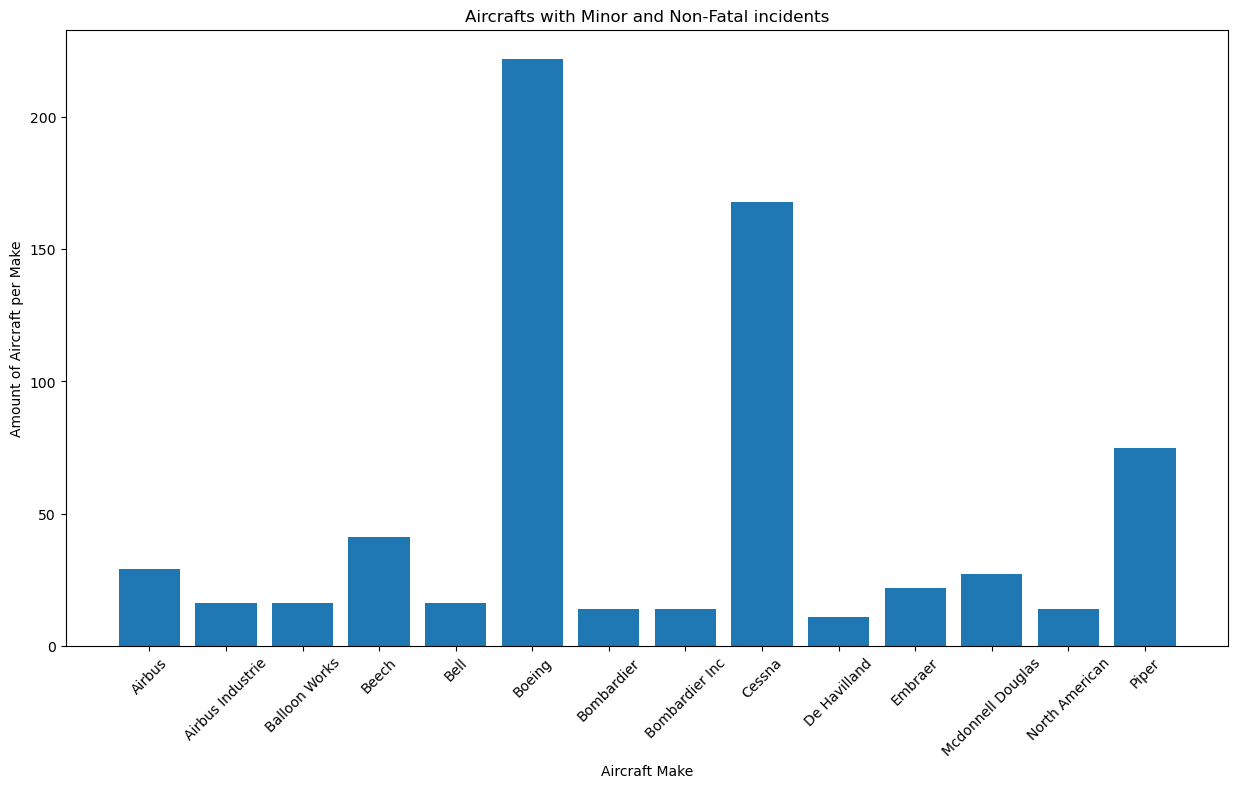

In [54]:
fig, ax = plt.subplots(figsize=(15,8))

# colors=[grouped_data['Injury.Severity'], grouped_data['Aircraft.damage']]
ax.bar(make_over_10['Make'], make_over_10['Count'])
# ax.plot(make_over_10['Make'], make_over_10['Count'], marker='o')
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Amount of Aircraft per Make')
ax.set_title('Aircrafts with Minor and Non-Fatal incidents')
ax.set_xticklabels(make_over_10['Make'],rotation=45)
plt.show();

Based on the visualization above, we can see that throughout the dataframe we have a number of aircrafts that fall under the categories of **Non-Fatal** injuries and **Minor** damage. Boeing and Cessna are aircrafts that are considered to fall under these categories.

Next, we'll explore the safety features for each aircrafts to establish which aircrafts are considered safe for the NTSB and FAA

In [55]:
 data

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,WPR23LA065,2022-12-13,"Lewistown, MT",United States,047257N,0109280W,KLWT,Lewiston Municipal Airport,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,14-12-2022
88873,20221215106463,Accident,ERA23LA090,2022-12-14,"San Juan, PR",United States,182724N,0066554W,SIG,FERNANDO LUIS RIBAS DOMINICCI,...,Personal,SKY WEST AVIATION INC TRUSTEE,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88876,20221219106475,Accident,WPR23LA069,2022-12-15,"Wichita, KS",United States,373829N,0972635W,ICT,WICHITA DWIGHT D EISENHOWER NT,...,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,19-12-2022
88877,20221219106470,Accident,ERA23LA091,2022-12-16,"Brooksville, FL",United States,282825N,0822719W,BKV,BROOKSVILLE-TAMPA BAY RGNL,...,Personal,GERBER RICHARD E,0.0,1.0,0.0,0.0,VMC,NaN,NaN,23-12-2022


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85164 entries, 0 to 88886
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                85164 non-null  object 
 1   Investigation.Type      85164 non-null  object 
 2   Accident.Number         85164 non-null  object 
 3   Event.Date              85164 non-null  object 
 4   Location                85119 non-null  object 
 5   Country                 84954 non-null  object 
 6   Latitude                33278 non-null  object 
 7   Longitude               33268 non-null  object 
 8   Airport.Code            48910 non-null  object 
 9   Airport.Name            51441 non-null  object 
 10  Injury.Severity         85164 non-null  object 
 11  Aircraft.damage         85164 non-null  object 
 12  Aircraft.Category       30361 non-null  object 
 13  Registration.Number     83992 non-null  object 
 14  Make                    85164 non-null  obj

Within the dataframe, we can identify safety features by using the **Number of Engines** , **Engine Type**, and **Weather Condition**

Let's start by analyzing the number of engines. We'll see how many missing values there are within the column.

In [68]:
data['Number.of.Engines']

0        1.0
1        1.0
2        1.0
3        1.0
4        NaN
        ... 
88869    2.0
88873    1.0
88876    2.0
88877    1.0
88886    1.0
Name: Number.of.Engines, Length: 85164, dtype: float64

In [64]:
data['Number.of.Engines'].isna()

0        False
1        False
2        False
3        False
4         True
         ...  
88869    False
88873    False
88876    False
88877    False
88886    False
Name: Number.of.Engines, Length: 85164, dtype: bool

In [62]:
data['Number.of.Engines'].isna().sum()

4528

We can see that there are a few values missing within the column. We can replace the values with the mean of the total column.

In [66]:
len(data['Number.of.Engines'])

85164

In [74]:
engine_number_mean = float(round(data['Number.of.Engines'].mean()))
engine_number_mean

1.0

In [75]:
data['Number.of.Engines'].fillna(engine_number_mean, inplace=True)

In [78]:
data['Number.of.Engines'].isna().sum()

0

In [81]:
make_over_10['Number of Engines'] = data['Number.of.Engines']
make_over_10

C:\Users\omend\AppData\Local\Temp\ipykernel_15212\1125354717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  make_over_10['Number of Engines'] = data['Number.of.Engines']


,Make,Injury.Severity,Aircraft.damage,Count,Number of Engines
16,Airbus,Non-Fatal,Minor,29,1.0
18,Airbus Industrie,Non-Fatal,Minor,16,1.0
30,Balloon Works,Non-Fatal,Minor,16,1.0
33,Beech,Non-Fatal,Minor,41,2.0
35,Bell,Non-Fatal,Minor,16,1.0
41,Boeing,Non-Fatal,Minor,222,1.0
45,Bombardier,Non-Fatal,Minor,14,2.0
46,Bombardier Inc,Non-Fatal,Minor,14,1.0
63,Cessna,Non-Fatal,Minor,168,1.0
83,De Havilland,Non-Fatal,Minor,11,1.0


In [93]:
make_over_10[make_over_10['Number of Engines'] >= 3]

,Make,Injury.Severity,Aircraft.damage,Count,Number of Engines
155,Mcdonnell Douglas,Non-Fatal,Minor,27,3.0


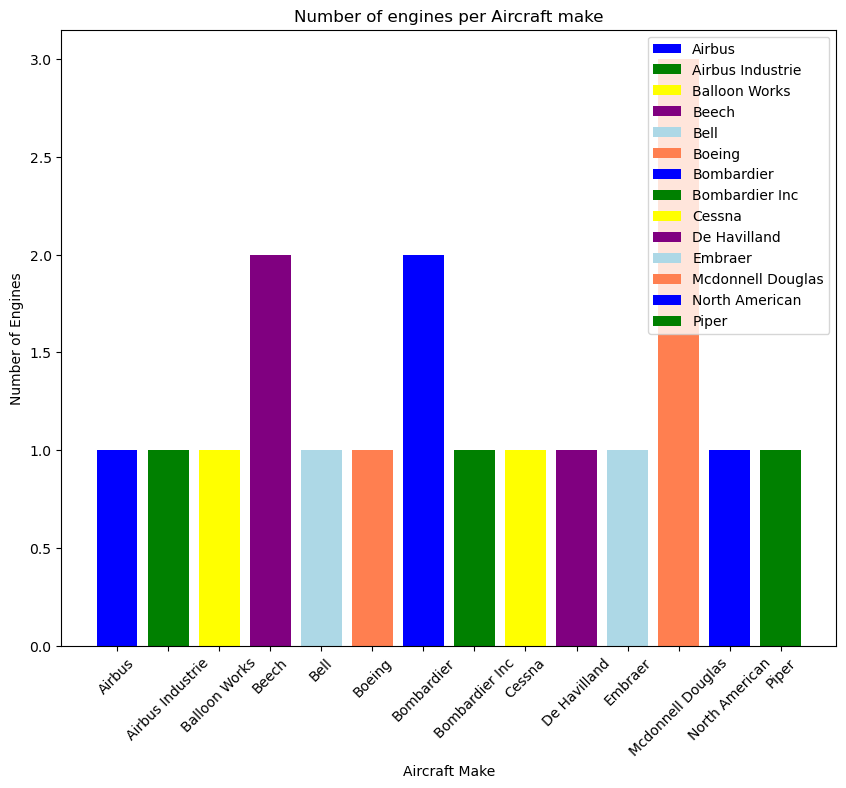

In [96]:
fig, ax = plt.subplots(figsize=(10,8))

categories = list(make_over_10['Make'])

colors = np.random.rand(len(categories),3)

ax.bar(make_over_10['Make'], make_over_10['Number of Engines'], label=make_over_10['Make'], color=color)
ax.set_xlabel('Aircraft Make')
ax.set_ylabel('Number of Engines')
ax.set_title('Number of engines per Aircraft make')
ax.set_xticks(make_over_10['Make'])
ax.set_xticklabels(make_over_10['Make'], rotation=45)
ax.legend()
plt.show();


The visualization provided shows that Mcdonnell Douglas aircrafts are equipped with **3 engines**. Followed by the Boeing, and Beech which are equipped with **2 engines**

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85164 entries, 0 to 88886
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                85164 non-null  object 
 1   Investigation.Type      85164 non-null  object 
 2   Accident.Number         85164 non-null  object 
 3   Event.Date              85164 non-null  object 
 4   Location                85119 non-null  object 
 5   Country                 84954 non-null  object 
 6   Latitude                33278 non-null  object 
 7   Longitude               33268 non-null  object 
 8   Airport.Code            48910 non-null  object 
 9   Airport.Name            51441 non-null  object 
 10  Injury.Severity         85164 non-null  object 
 11  Aircraft.damage         85164 non-null  object 
 12  Aircraft.Category       30361 non-null  object 
 13  Registration.Number     83992 non-null  object 
 14  Make                    85164 non-null  obj

Next we'll explore the Engine Type for each aircraft

In [102]:
data['Engine.Type'].head(50)

0     Reciprocating
1     Reciprocating
2     Reciprocating
3     Reciprocating
4               NaN
5         Turbo Fan
6     Reciprocating
7     Reciprocating
8     Reciprocating
9     Reciprocating
10    Reciprocating
11    Reciprocating
12    Reciprocating
13    Reciprocating
14    Reciprocating
15    Reciprocating
16    Reciprocating
17    Reciprocating
18    Reciprocating
19    Reciprocating
20    Reciprocating
21    Reciprocating
22      Turbo Shaft
23    Reciprocating
24    Reciprocating
25    Reciprocating
26    Reciprocating
27    Reciprocating
28    Reciprocating
29    Reciprocating
30    Reciprocating
31    Reciprocating
32    Reciprocating
33    Reciprocating
34    Reciprocating
35    Reciprocating
36    Reciprocating
37    Reciprocating
38    Reciprocating
39    Reciprocating
40    Reciprocating
41    Reciprocating
42    Reciprocating
43    Reciprocating
44    Reciprocating
45    Reciprocating
46      Turbo Shaft
47    Reciprocating
48    Reciprocating
49    Reciprocating


There are 5 types of Engines: 

* **Reciprocating Engine** - Also known as a piston engine or internal combustion engine, it is a heat engine using fuel ignition created inside a single or multiple reciprocating pistons to produce high temperatures and high pressure, which generates rotating motion.

* **Turbodrop Engine** - A turboprop engine is a type of aircraft engine offering the low maintenance and high speeds of a gas turbine engine with the reliability of a propeller drive system.

* **Turboshaft Engine** - Turboshaft engines are lightweight and powerful aircraft engines commonly used in real-world applications requiring fuel-efficient, robust, and compact powerplants like tanks, helicopters, hovercrafts, and auxiliary power units.

* **Turbojet Engine** - A turbojet engine is a type of aircraft engine whose primary means of propulsion is the rearward discharge of hot exhaust gas. It is an airbreathing jet engine that works by sucking atmospheric air into a compressor. 

* **TurboFan Engine** - Another air-breathing engine, the turbofan engine, is a type of aircraft engine commonly found on large commercial airliners.

Next, we'll identify the amount of missing values within the Engine Type column, and decide what would be best method to handle the missing the missing values.

In [105]:
data['Engine.Type'].isna().sum()

5439